## Deeper analysis on a enhanced dataset

Considering a greater statistics, the same analysis as the 287e is performed

Here the efficiency plots are provided

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import ultraplot as plot 


import uproot
import mplhep as hep
import hist
import hist.intervals
import hist.plot

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False
plot.rc['axes.autolimit_mode'] = 'data'

plot.rc['cmap.levels'] = 4

data = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')
print(data.keys())

reco_true_cheated = data['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal = data['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated = data['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal = data['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated = data['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal = data['reco_nominal_reconstruction'].arrays(library='pd')

['POT;18', 'POT;17', 'POT;16', 'POT;15', 'POT;14', 'POT;13', 'POT;12', 'POT;11', 'POT;10', 'POT;9', 'POT;8', 'POT;7', 'POT;6', 'POT;5', 'POT;4', 'POT;3', 'POT;2', 'POT;1', 'Livetime;18', 'Livetime;17', 'Livetime;16', 'Livetime;15', 'Livetime;14', 'Livetime;13', 'Livetime;12', 'Livetime;11', 'Livetime;10', 'Livetime;9', 'Livetime;8', 'Livetime;7', 'Livetime;6', 'Livetime;5', 'Livetime;4', 'Livetime;3', 'Livetime;2', 'Livetime;1', 'reco_true_cheated_2D_Vtx_3D_Nu_Mva;1', 'reco_cheated_2D_Vtx_3D_Nu_Mva;1', 'true_cheated_2D_Vtx_3D_Nu_Mva;1', 'reco_true_cheated_2D_Vtx_3D_Nu;1', 'reco_cheated_2D_Vtx_3D_Nu;1', 'true_cheated_2D_Vtx_3D_Nu;1', 'reco_true_cheated_2D_Vtx_3D;1', 'reco_cheated_2D_Vtx_3D;1', 'true_cheated_2D_Vtx_3D;1', 'reco_true_cheated_2D_Vtx;1', 'reco_cheated_2D_Vtx;1', 'true_cheated_2D_Vtx;1', 'reco_true_cheated_2D;1', 'reco_cheated_2D;1', 'true_cheated_2D;1', 'reco_true_nominal_reconstruction;1', 'reco_nominal_reconstruction;1', 'true_nominal_reconstruction;1']


## Some events are not common...

Even if the new configuration would have helped, I probably mangled something while trying the configurations, so there are an excess of ~400 events, but this is just a fix

In [2]:
def check_commons(a, b):
    a, b = a.sort_values('event'), b.sort_values('event')
    common = pd.merge(a.event, b.event, on='event')
    print(f'Comparing we got {a.event.shape = } and {b.event.shape = } and {common.event.shape = }')
    print(f'{a[~a.event.isin(common.event)].event.shape = } and {b[~b.event.isin(common.event)].event.shape = }')

    # for eA, eB in zip(a[a.event.isin(common.event)].event, b[b.event.isin(common.event)].event):
    #     if eA != eB:
    #         print(f'{eA = }, {eB = }')

    return common

reco_true_common = check_commons(reco_true_cheated, reco_true_nominal)
reco_true_common = check_commons(reco_true_cheated, true_nominal)
reco_true_common = check_commons(reco_true_cheated, reco_nominal)

reco_true_common = check_commons(true_cheated, reco_true_nominal)
reco_true_common = check_commons(reco_cheated, reco_true_nominal)
true_common = check_commons(true_cheated, true_nominal)
reco_common = check_commons(reco_cheated, reco_nominal)

Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,)

Apparently no events are in excess (strange but probably handled by some cuts) so we have the full statistics

## Efficiency plots

Per valutare come cambia l'efficienza di ricostruzione. 

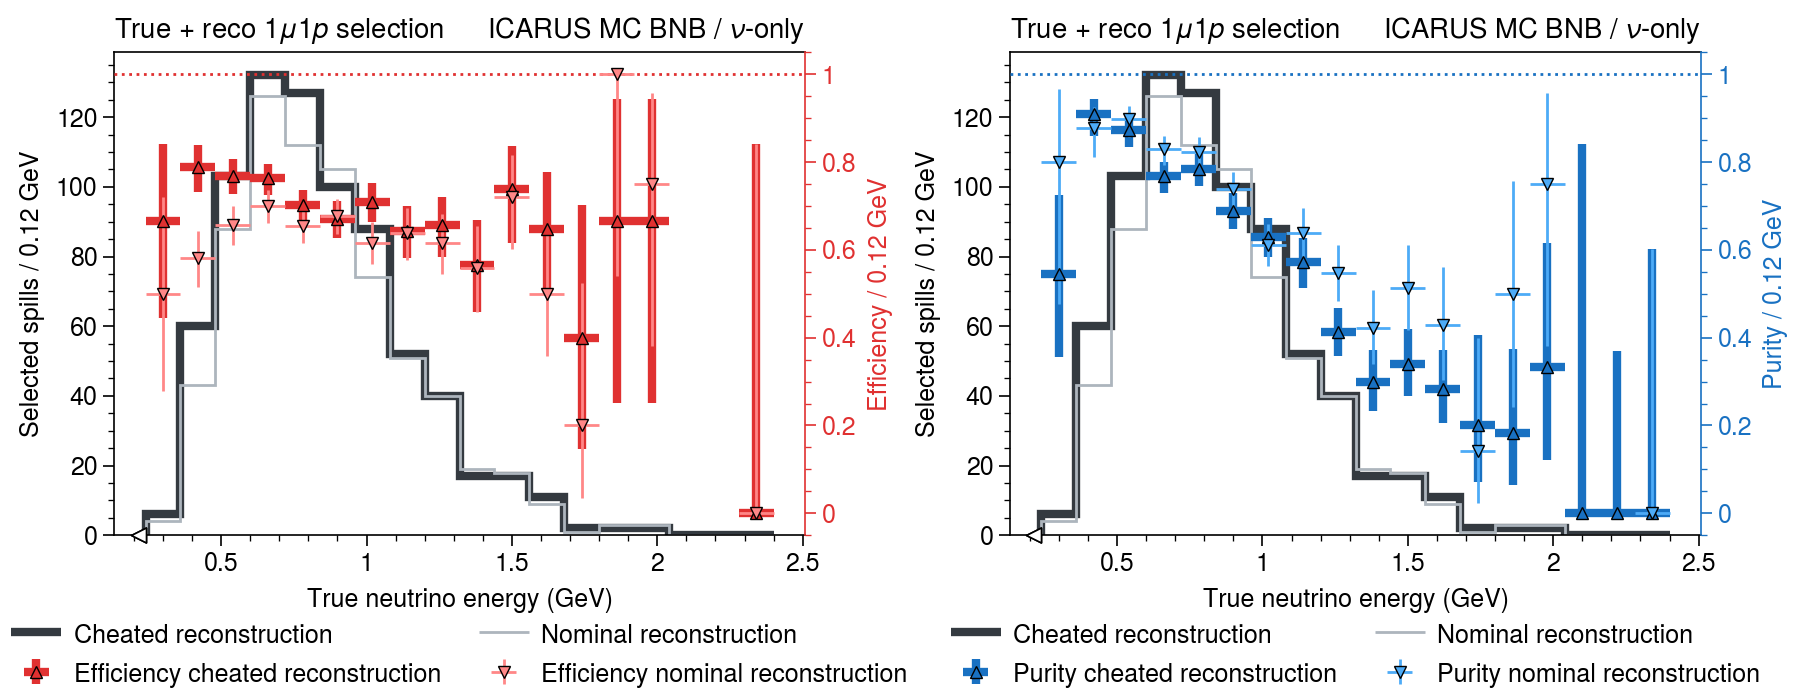

In [5]:

def efficiency_purity(reco_true, reco, true, bins=energy_bins_H):
    reco_true_H = hist.Hist(bins).fill(reco_true)
    reco_H = hist.Hist(bins).fill(reco)
    true_H = hist.Hist(bins).fill(true)

    hists = reco_true_H, reco_H, true_H

    reco_true_values = reco_true_H.values()
    reco_values = reco_H.values()
    true_values = true_H.values()

    with np.errstate(divide="ignore", invalid="ignore"):
        efficiency = reco_true_values/true_values
        purity = reco_true_values/reco_values

        err_efficiency = hist.intervals.ratio_uncertainty(reco_true_values, true_values, 'efficiency')
        err_purity = hist.intervals.ratio_uncertainty(reco_true_values, reco_values, 'efficiency')

        eff_ret = efficiency, err_efficiency
        pur_ret = purity, err_purity

    return hists, eff_ret, pur_ret

energy_bins_H = hist.axis.Regular(18, 0.24, 2.4, name='Energy (GeV)')

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'True neutrino energy (GeV)', ylabel=f'Selected spills / {energy_bins_H.widths[0]:.2f} GeV',  
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle='True + reco $1\\mu1p$ selection'# , yscale='log'
    # suptitle='Vertex differences'
)

hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(reco_true=reco_true_cheated.true_E.values, reco=reco_cheated.true_E.values, true=true_cheated.true_E.values, bins=energy_bins_H)
hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(reco_true=reco_true_nominal.true_E.values, reco=reco_nominal.true_E.values, true=true_nominal.true_E.values, bins=energy_bins_H)

hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[0])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[0])
# hep.histplot(hists_cheated[2], yerr=False, color='gray8', lw=3, ls=':', label=r'Cheated reco. (true $1\mu1p$)', ax=ax[0])
# hep.histplot(hists_nominal[2], yerr=False, color='gray5', lw=1, ls=':', label=r'Nominal reco. (true $1\mu1p$)', ax=ax[0])

eff_ax = ax[0].alty(color='red8', label=f'Efficiency / {energy_bins_H.widths[0]:.2f} GeV')
eff_ax.axhline(1, color='red8', lw=1, ls=':')
eff_ax.errorbar(energy_bins_H.centers, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=energy_bins_H.widths[0]/2, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reconstruction')
eff_ax.errorbar(energy_bins_H.centers, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=energy_bins_H.widths[0]/2, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reconstruction')
eff_ax.legend(ncols=2, loc='b')

# hep.histplot(hists_cheated[1], yerr=False, color='gray8', lw=3, alpha=0.75, hatch=r'o', label=r'Cheated reco. (reco $1\mu1p$)', ax=ax[1])
# hep.histplot(hists_nominal[1], yerr=False, color='gray5', lw=1, alpha=0.75, hatch=r'OOO', label=r'Nominal reco. (reco $1\mu1p$)', ax=ax[1])
hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[1])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[1])

pur_ax = ax[1].alty(color='blue8', label=f'Purity / {energy_bins_H.widths[0]:.2f} GeV')
pur_ax.axhline(1, color='blue8', lw=1, ls=':')
pur_ax.errorbar(energy_bins_H.centers, purity_cheated[0], yerr=purity_cheated[1], xerr=energy_bins_H.widths[0]/2, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Purity cheated reconstruction')
pur_ax.errorbar(energy_bins_H.centers, purity_nominal[0], yerr=purity_nominal[1], xerr=energy_bins_H.widths[0]/2, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Purity nominal reconstruction')
pur_ax.legend(ncols=2, loc='b')

fig.savefig('efficiency_purity.pdf', bbox_inches='tight')

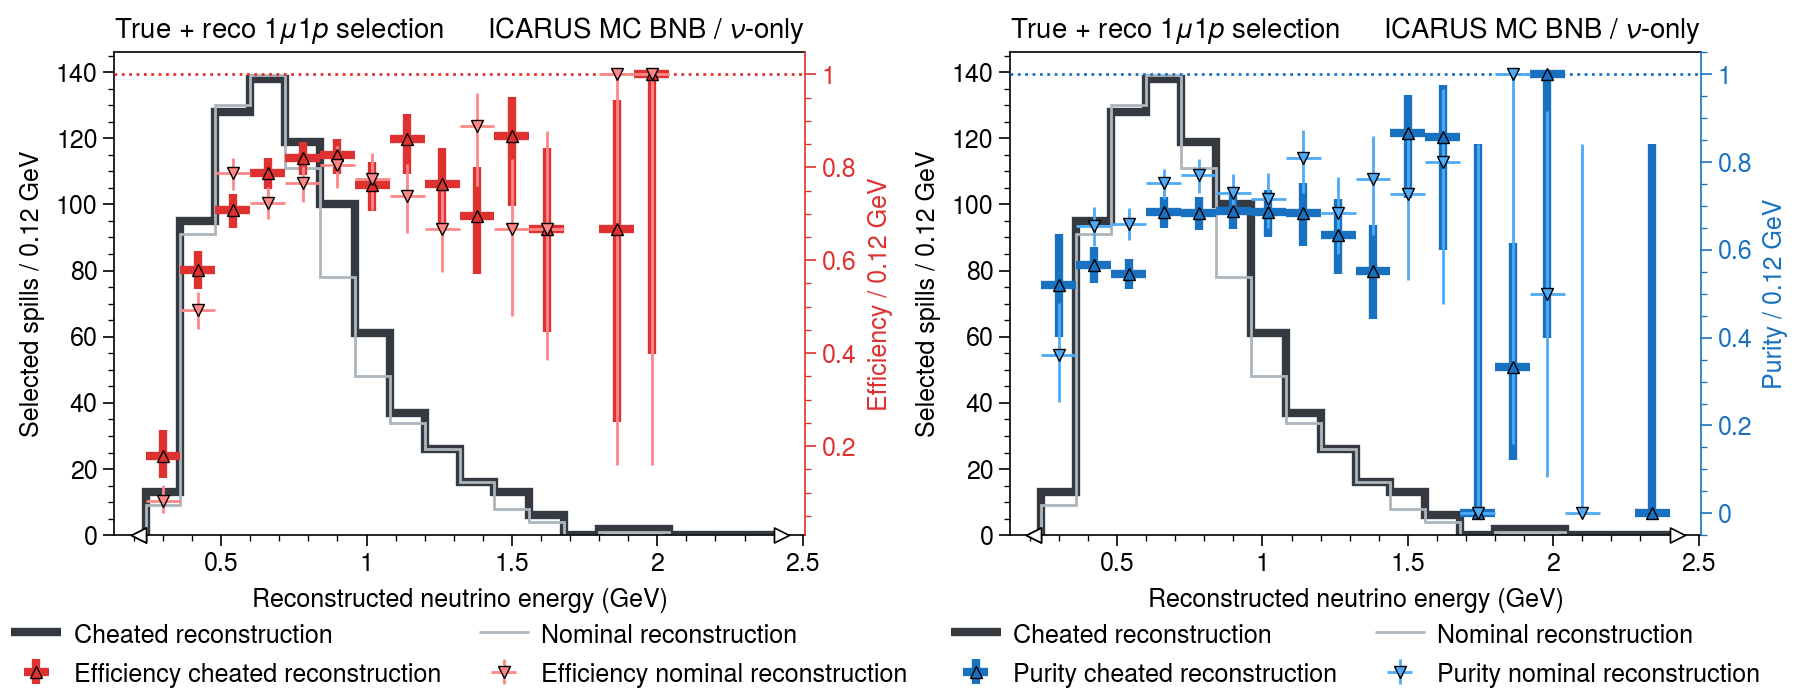

In [6]:
energy_bins_H = hist.axis.Regular(18, 0.24, 2.4, name='Energy (GeV)')
fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reconstructed neutrino energy (GeV)', ylabel=f'Selected spills / {energy_bins_H.widths[0]:.2f} GeV',  
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle='True + reco $1\\mu1p$ selection'# , yscale='log'
    # suptitle='Vertex differences'
)

hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(reco_true=reco_true_cheated.reco_E.values, reco=reco_cheated.reco_E.values, true=true_cheated.reco_E.values, bins=energy_bins_H)
hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(reco_true=reco_true_nominal.reco_E.values, reco=reco_nominal.reco_E.values, true=true_nominal.reco_E.values, bins=energy_bins_H)

hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[0])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[0])
# hep.histplot(hists_cheated[2], yerr=False, color='gray8', lw=3, ls=':', label=r'Cheated reco. (true $1\mu1p$)', ax=ax[0])
# hep.histplot(hists_nominal[2], yerr=False, color='gray5', lw=1, ls=':', label=r'Nominal reco. (true $1\mu1p$)', ax=ax[0])

eff_ax = ax[0].alty(color='red8', label=f'Efficiency / {energy_bins_H.widths[0]:.2f} GeV')
eff_ax.axhline(1, color='red8', lw=1, ls=':')
eff_ax.errorbar(energy_bins_H.centers, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=energy_bins_H.widths[0]/2, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reconstruction')
eff_ax.errorbar(energy_bins_H.centers, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=energy_bins_H.widths[0]/2, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reconstruction')
eff_ax.legend(ncols=2, loc='b')

# hep.histplot(hists_cheated[1], yerr=False, color='gray8', lw=3, alpha=0.75, hatch=r'o', label=r'Cheated reco. (reco $1\mu1p$)', ax=ax[1])
# hep.histplot(hists_nominal[1], yerr=False, color='gray5', lw=1, alpha=0.75, hatch=r'OOO', label=r'Nominal reco. (reco $1\mu1p$)', ax=ax[1])
hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[1])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[1])

pur_ax = ax[1].alty(color='blue8', label=f'Purity / {energy_bins_H.widths[0]:.2f} GeV')
pur_ax.axhline(1, color='blue8', lw=1, ls=':')
pur_ax.errorbar(energy_bins_H.centers, purity_cheated[0], yerr=purity_cheated[1], xerr=energy_bins_H.widths[0]/2, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Purity cheated reconstruction')
pur_ax.errorbar(energy_bins_H.centers, purity_nominal[0], yerr=purity_nominal[1], xerr=energy_bins_H.widths[0]/2, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Purity nominal reconstruction')
pur_ax.legend(ncols=2, loc='b')

fig.savefig('efficiency_purity_reco_E.pdf', bbox_inches='tight')

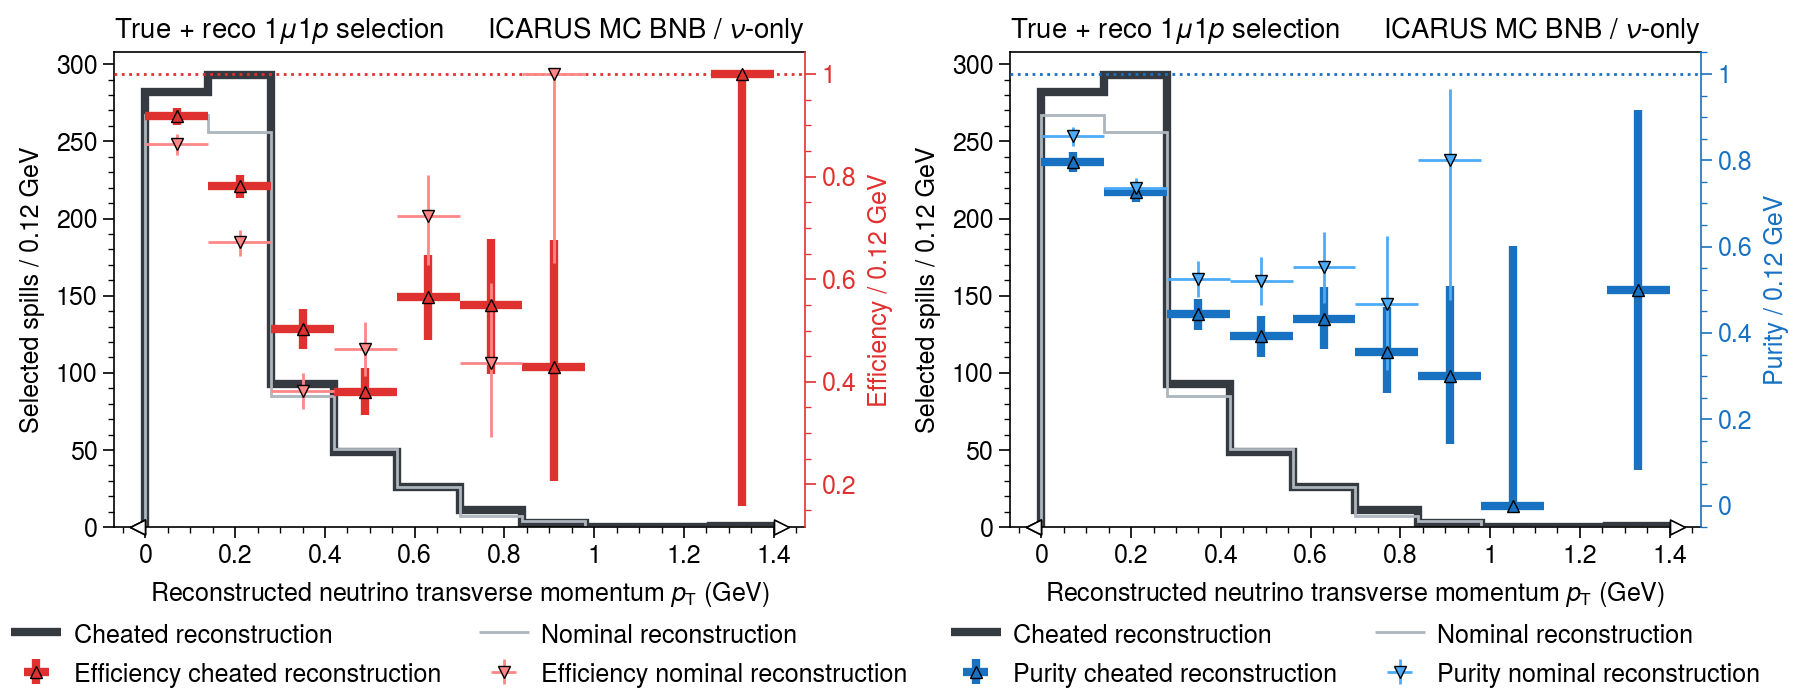

In [7]:
pT_bins_H = hist.axis.Regular(10, 0., 1.4, name='Energy (GeV)')
fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reconstructed neutrino transverse momentum $p_\text{T}$ (GeV)', ylabel=f'Selected spills / {energy_bins_H.widths[0]:.2f} GeV',  
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle='True + reco $1\\mu1p$ selection'# , yscale='log'
    # suptitle='Vertex differences'
)

hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(reco_true=reco_true_cheated.reco_pT.values, reco=reco_cheated.reco_pT.values, true=true_cheated.reco_pT.values, bins=pT_bins_H)
hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(reco_true=reco_true_nominal.reco_pT.values, reco=reco_nominal.reco_pT.values, true=true_nominal.reco_pT.values, bins=pT_bins_H)

hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[0])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[0])
# hep.histplot(hists_cheated[2], yerr=False, color='gray8', lw=3, ls=':', label=r'Cheated reco. (true $1\mu1p$)', ax=ax[0])
# hep.histplot(hists_nominal[2], yerr=False, color='gray5', lw=1, ls=':', label=r'Nominal reco. (true $1\mu1p$)', ax=ax[0])

eff_ax = ax[0].alty(color='red8', label=f'Efficiency / {energy_bins_H.widths[0]:.2f} GeV')
eff_ax.axhline(1, color='red8', lw=1, ls=':')
eff_ax.errorbar(pT_bins_H.centers, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=pT_bins_H.widths[0]/2, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reconstruction')
eff_ax.errorbar(pT_bins_H.centers, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=pT_bins_H.widths[0]/2, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reconstruction')
eff_ax.legend(ncols=2, loc='b')

# hep.histplot(hists_cheated[1], yerr=False, color='gray8', lw=3, alpha=0.75, hatch=r'o', label=r'Cheated reco. (reco $1\mu1p$)', ax=ax[1])
# hep.histplot(hists_nominal[1], yerr=False, color='gray5', lw=1, alpha=0.75, hatch=r'OOO', label=r'Nominal reco. (reco $1\mu1p$)', ax=ax[1])
hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[1])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[1])

pur_ax = ax[1].alty(color='blue8', label=f'Purity / {energy_bins_H.widths[0]:.2f} GeV')
pur_ax.axhline(1, color='blue8', lw=1, ls=':')
pur_ax.errorbar(pT_bins_H.centers, purity_cheated[0], yerr=purity_cheated[1], xerr=pT_bins_H.widths[0]/2, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Purity cheated reconstruction')
pur_ax.errorbar(pT_bins_H.centers, purity_nominal[0], yerr=purity_nominal[1], xerr=pT_bins_H.widths[0]/2, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Purity nominal reconstruction')
pur_ax.legend(ncols=2, loc='b')

fig.savefig('efficiency_purity_reco_pT.pdf', bbox_inches='tight')

# 1µ1p Efficiency nominal/cheated reconstruction

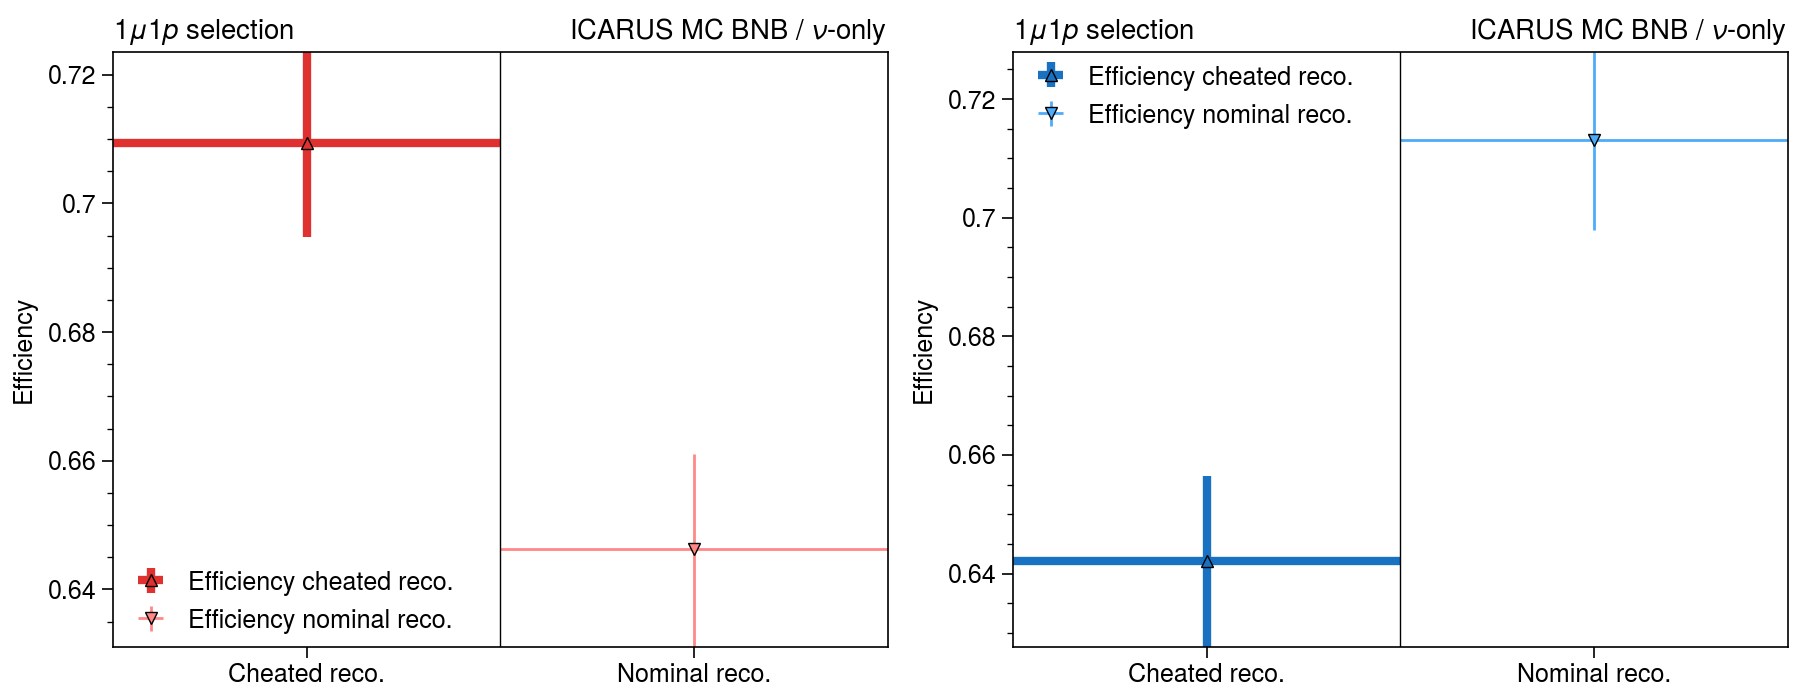

In [8]:

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle=r'$1\mu1p$ selection'# , yscale='log'
)

data = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')

reco_true_cheated = data['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal = data['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated = data['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal = data['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated = data['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal = data['reco_nominal_reconstruction'].arrays(library='pd')


energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')
hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(reco_true=reco_true_cheated.true_E.values, reco=reco_cheated.true_E.values, true=true_cheated.true_E.values, bins=energy_bins_H)
hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(reco_true=reco_true_nominal.true_E.values, reco=reco_nominal.true_E.values, true=true_nominal.true_E.values, bins=energy_bins_H)

ax[0].errorbar(1, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[0].errorbar(2, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[0].axvline(1.5, color='k', lw=0.5)
ax[0].legend(ncols=1, loc='ll')
ax[0].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])

ax[1].errorbar(1, purity_cheated[0], yerr=purity_cheated[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[1].errorbar(2, purity_nominal[0], yerr=purity_nominal[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[1].axvline(1.5, color='k', lw=0.5)
ax[1].legend(ncols=1, loc='ul')
ax[1].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])


## 1µNp Efficiency nominal/cheated reconstruction

Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)


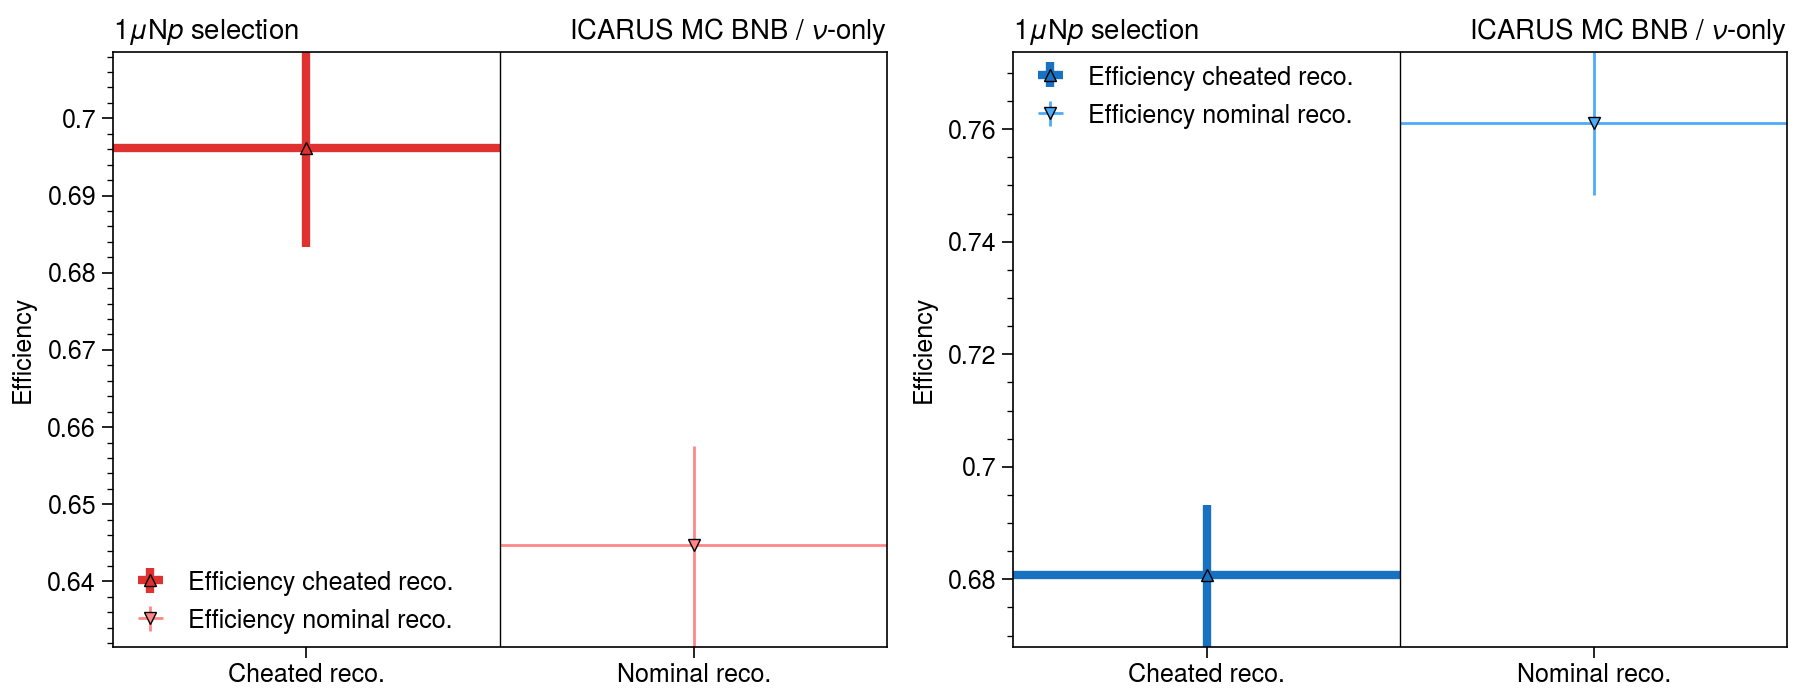

In [9]:
fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle=r'$1\mu \mathrm{N}p$ selection'# , yscale='log'
)

data = uproot.open('efficiency_plot_1uNp.root:efficiency_studies')

reco_true_cheated = data['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal = data['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated = data['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal = data['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated = data['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal = data['reco_nominal_reconstruction'].arrays(library='pd')

reco_true_common = check_commons(reco_true_cheated, reco_true_nominal)
true_common = check_commons(true_cheated, true_nominal)
reco_common = check_commons(reco_cheated, true_nominal)




energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')
hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(
    reco_true=reco_true_cheated[reco_true_cheated.event.isin(reco_true_common.event)].true_E.values, 
    reco=reco_cheated[reco_cheated.event.isin(reco_common.event)].true_E.values, 
    true=true_cheated[true_cheated.event.isin(true_common.event)].true_E.values, bins=energy_bins_H
)

hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(
    reco_true=reco_true_nominal[reco_true_nominal.event.isin(reco_true_common.event)].true_E.values, 
    reco=reco_nominal[reco_nominal.event.isin(reco_common.event)].true_E.values, 
    true=true_nominal[true_nominal.event.isin(true_common.event)].true_E.values, bins=energy_bins_H
)

ax[0].errorbar(1, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[0].errorbar(2, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[0].axvline(1.5, color='k', lw=0.5)
ax[0].legend(ncols=1, loc='ll')
ax[0].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])

ax[1].errorbar(1, purity_cheated[0], yerr=purity_cheated[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[1].errorbar(2, purity_nominal[0], yerr=purity_nominal[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[1].axvline(1.5, color='k', lw=0.5)
ax[1].legend(ncols=1, loc='ul')
ax[1].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])

## BOTH

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_1193/3584276786.py:37: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary', color='k', loc='left', weight='bold')


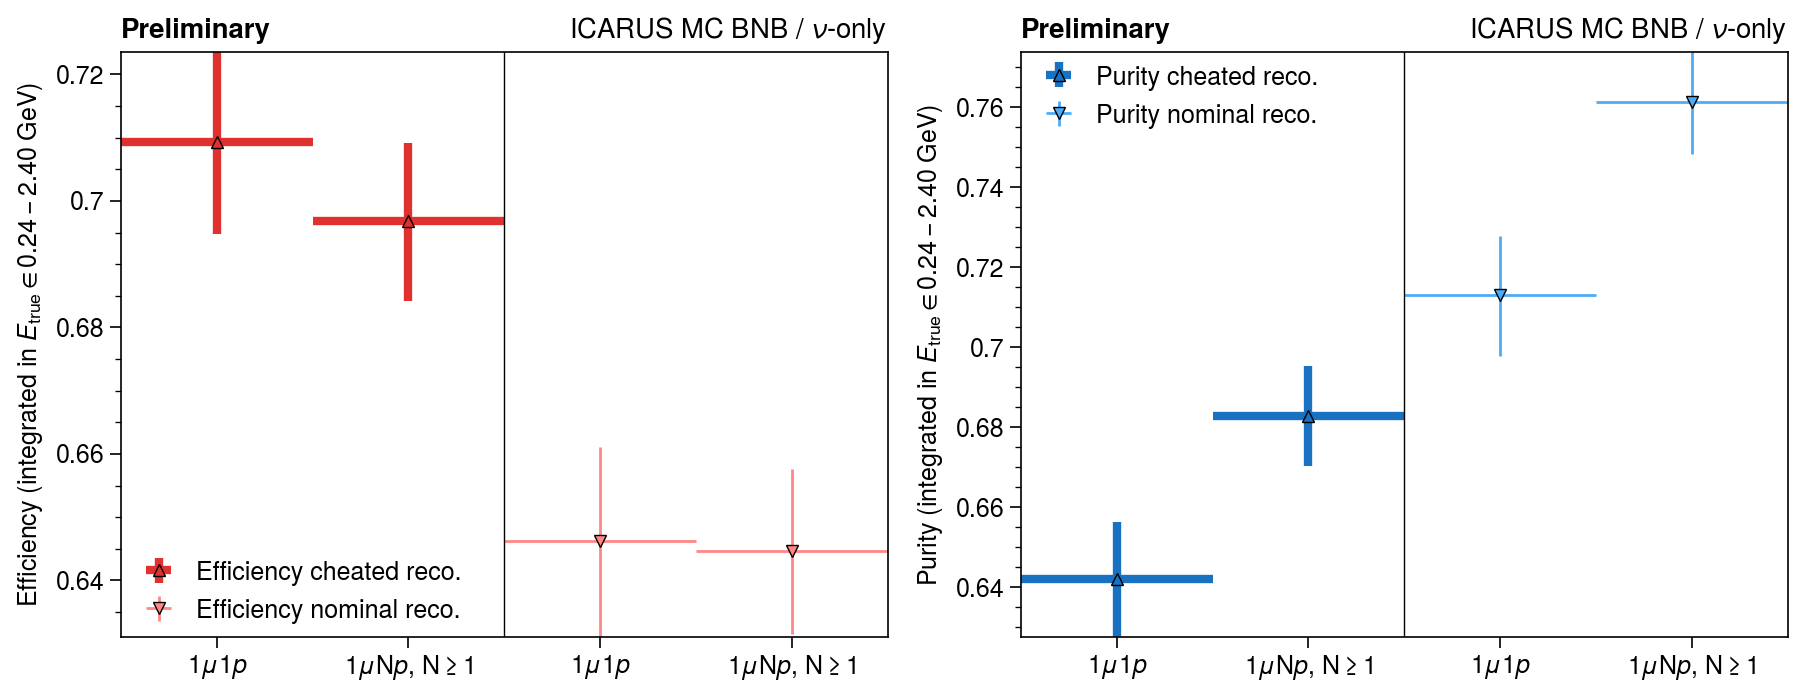

In [10]:

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, ylabel=f'Efficiency (integrated in $E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV)',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', xticks=[0.5, 1.5, 2.5, 3.5], xticklabels=[r'$1\mu1p$', r'$1\mu\mathrm{N}p$, $\mathrm{N}\geq1$', r'$1\mu1p$', r'$1\mu\mathrm{N}p$, $\mathrm{N}\geq1$'],
    # ltitle=r'$1\mu \mathrm{N}p$ selection'# , yscale='log'
)

energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')

data_1u1p = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')
data_1uNp = uproot.open('efficiency_plot_1uNp.root:efficiency_studies')

reco_true_cheated_1u1p = data_1u1p['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal_1u1p = data_1u1p['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated_1u1p = data_1u1p['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal_1u1p = data_1u1p['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated_1u1p = data_1u1p['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal_1u1p = data_1u1p['reco_nominal_reconstruction'].arrays(library='pd')

hists_cheated_1u1p, efficiency_cheated_1u1p, purity_cheated_1u1p = efficiency_purity(reco_true=reco_true_cheated_1u1p.true_E.values, reco=reco_cheated_1u1p.true_E.values, true=true_cheated_1u1p.true_E.values, bins=energy_bins_H)
hists_nominal_1u1p, efficiency_nominal_1u1p, purity_nominal_1u1p = efficiency_purity(reco_true=reco_true_nominal_1u1p.true_E.values, reco=reco_nominal_1u1p.true_E.values, true=true_nominal_1u1p.true_E.values, bins=energy_bins_H)

reco_true_cheated_1uNp = data_1uNp['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal_1uNp = data_1uNp['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated_1uNp = data_1uNp['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal_1uNp = data_1uNp['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated_1uNp = data_1uNp['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal_1uNp = data_1uNp['reco_nominal_reconstruction'].arrays(library='pd')

hists_cheated_1uNp, efficiency_cheated_1uNp, purity_cheated_1uNp = efficiency_purity(reco_true=reco_true_cheated_1uNp.true_E.values, reco=reco_cheated_1uNp.true_E.values, true=true_cheated_1uNp.true_E.values, bins=energy_bins_H)
hists_nominal_1uNp, efficiency_nominal_1uNp, purity_nominal_1uNp = efficiency_purity(reco_true=reco_true_nominal_1uNp.true_E.values, reco=reco_nominal_1uNp.true_E.values, true=true_nominal_1uNp.true_E.values, bins=energy_bins_H)

ax.set_title('Preliminary', color='k', loc='left', weight='bold')

ax[0].errorbar(0.5, efficiency_cheated_1u1p[0], yerr=efficiency_cheated_1u1p[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[0].errorbar(1.5, efficiency_cheated_1uNp[0], yerr=efficiency_cheated_1uNp[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3)
ax[0].errorbar(2.5, efficiency_nominal_1u1p[0], yerr=efficiency_nominal_1u1p[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[0].errorbar(3.5, efficiency_nominal_1uNp[0], yerr=efficiency_nominal_1uNp[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1)
ax[0].axvline(2, color='k', lw=0.5)
ax[0].legend(ncols=1, loc='ll')

ax[1].errorbar(0.5, purity_cheated_1u1p[0], yerr=purity_cheated_1u1p[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Purity cheated reco.')
ax[1].errorbar(1.5, purity_cheated_1uNp[0], yerr=purity_cheated_1uNp[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3)
ax[1].errorbar(2.5, purity_nominal_1u1p[0], yerr=purity_nominal_1u1p[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Purity nominal reco.')
ax[1].errorbar(3.5, purity_nominal_1uNp[0], yerr=purity_nominal_1uNp[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1)
ax[1].axvline(2, color='k', lw=0.5)
ax[1].legend(ncols=1, loc='ul')
ax[1].format(ylabel=f'Purity (integrated in $E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV)')


fig.savefig('efficiency_purity_1µ1p+1µNp.pdf', bbox_inches='tight')

# Cheating ladder 

We have the ability to perform the cheating process only on certain steps, so I can "cheat up to" a certain stage. So I can use this as to perform a study of what are the "best" and "worst" stages

## Easy selection 1µ1p

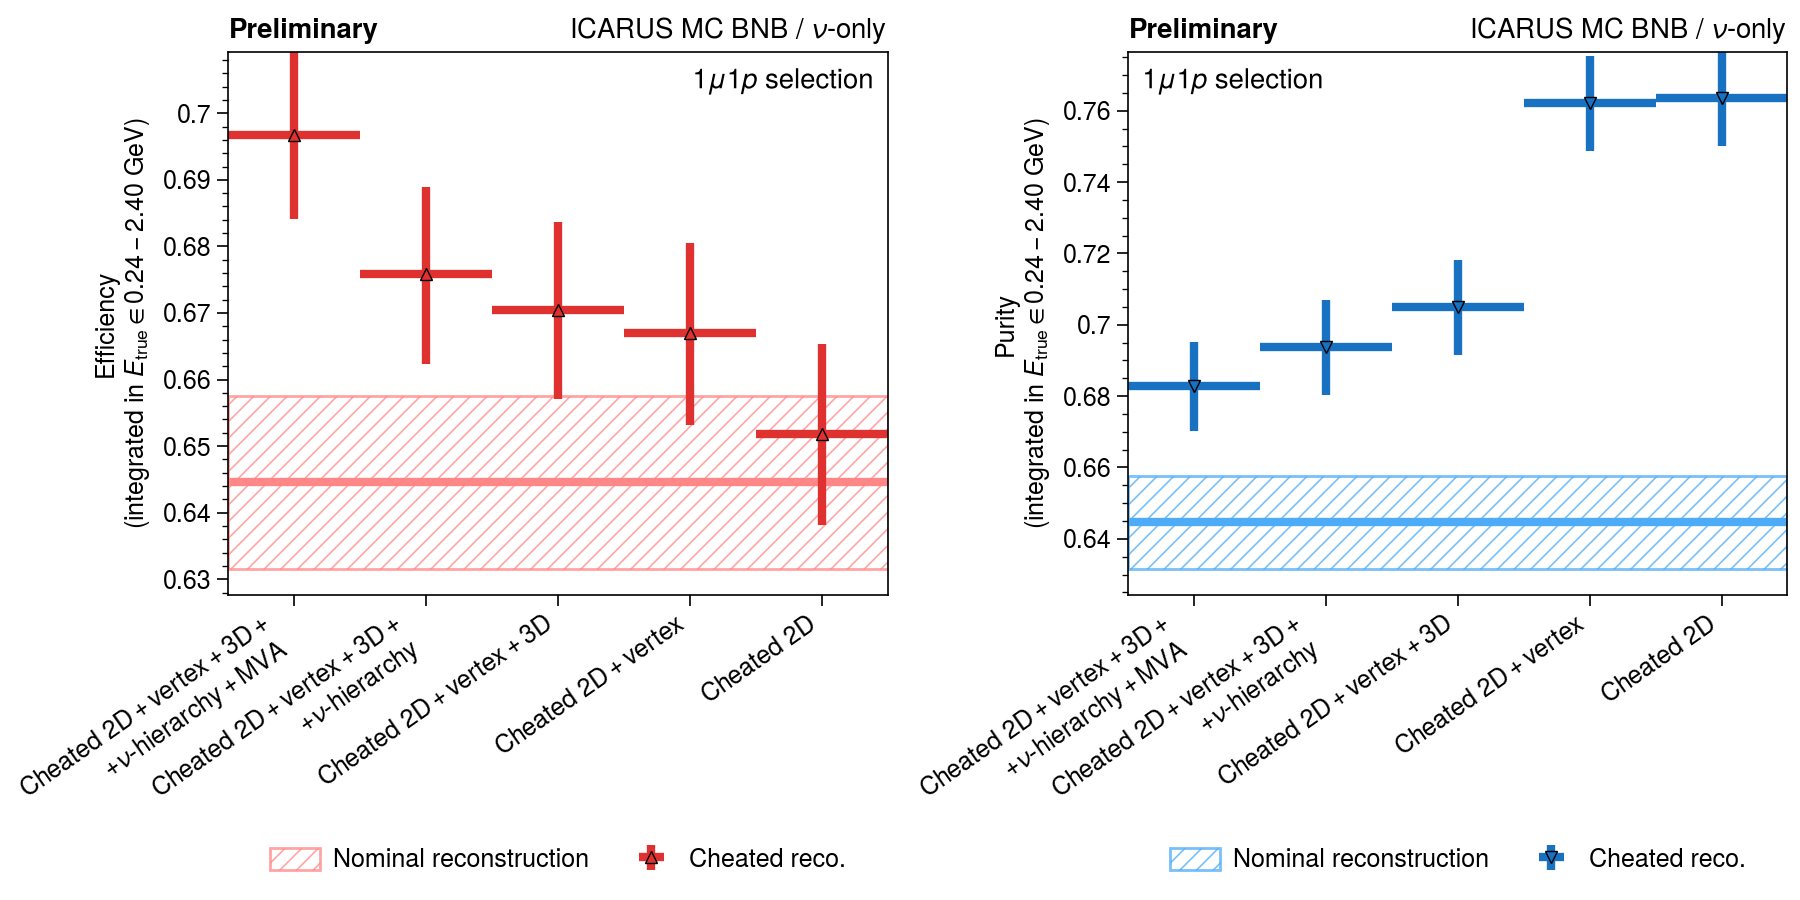

In [123]:

energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')

fig, ax = plot.subplots(
    width=9, height=4.5, ncols=2, nrows=1, ylabel=f'Efficiency\n(integrated in $E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV)',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5], 
    xticklabels=[
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
        'Cheated $2\\mathrm{D}$', 
    ],
    xrotation=35,
    urtitle=r'$1\mu1p$ selection'
    # , yscale='log'
)

data_1u1p = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')
ax[1].format(ylabel=f'Purity\n(integrated in $E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV)')

class Analysis:
    def __init__(self, binning=energy_bins_H, data=data_1u1p, tree_bases=['reco_true_{}', 'reco_{}', 'true_{}']):
        self.binning = binning
        self.data = data

        self.reco_true_base_string, self.reco_base_string, self.true_base_string = tree_bases

    def efficiency(self, tree_name: str, variable: str = 'true_E'):

        reco_true = data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        true = data[self.true_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, true.event, on='event')
        
        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        true_H = hist.Hist(self.binning).fill(true[true.event.isin(common.event)][variable].values)

        reco_true_values = reco_true_H.values()
        true_values = true_H.values()
        
        with np.errstate(divide="ignore", invalid="ignore"):
            efficiency = reco_true_values/true_values
            efficiency_uncertainty = hist.intervals.ratio_uncertainty(
                reco_true_values, true_values, 'efficiency'
            )
        
        return efficiency, efficiency_uncertainty
    
    def purity(self, tree_name: str, variable: str = 'true_E'):
        
        reco_true = data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        reco = data[self.reco_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, reco.event, on='event')
        
        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        reco_H = hist.Hist(self.binning).fill(reco[reco.event.isin(common.event)][variable].values)

        reco_true_values = reco_true_H.values()
        reco_values = reco_H.values()
        
        with np.errstate(divide="ignore", invalid="ignore"):
            purity = reco_true_values/reco_values
            purity_uncertainty = hist.intervals.ratio_uncertainty(
                reco_true_values, reco_values, 'efficiency'
            )
        
        return purity, purity_uncertainty



cheated_dict = {
    'xerr': 0.5, 
    'markersize': 4, 
    'mec': 'k', 
    'markeredgewidth': 0.5, 
    'capsize': 0, 
    'elinewidth': 3
}

analysis_1u1p = Analysis(data=data_1u1p)

trees = [
    'cheated_2D_Vtx_3D_Nu_Mva',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx',
    'cheated_2D'
]

## NOMINAL RECO
efficiency, (low, high) = analysis_1u1p.efficiency('nominal_reconstruction')
ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch='////', fill=False, ec='red4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[0].axhline(efficiency, lw=3, c='red4')

purity, (low, high) = analysis_1u1p.efficiency('nominal_reconstruction')
ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch='////', fill=False, ec='blue4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[1].axhline(purity, lw=3, c='blue4')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1u1p.efficiency(tree)
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis_1u1p.purity(tree)
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None))

ax[1].format(urtitle='', ultitle=r'$1\mu1p$ selection')
[axi.legend(loc='b') for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]

# fig.tight_layout()
fig.savefig('effciency_purity_ladder_plot_bottom_up.pdf', bbox_inches='tight')